In [1]:
## Initial setup
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
import os
from dotenv import load_dotenv

load_dotenv()
API_TOKEN = os.getenv("API_TOKEN")
service = QiskitRuntimeService(channel="ibm_quantum", token=API_TOKEN)
backend = service.backend(name="ibm_rensselaer")

### Trivial Circuit
Measuring qubits directly after initializing them to 0

In [3]:
# Initialize 2 qubits to 0
qc = qiskit.QuantumCircuit(2)
qc.initialize('00')
qc.measure_all()

In [5]:
# Execute the circuit
qc_transpiled = qiskit.transpile(qc, backend)
job = backend.run(qc_transpiled, shots=10**4)
result = job.result()

/tmp/ipykernel_124609/864542522.py:3: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(qc_transpiled, shots=10**4)


In [6]:
counts = result.get_counts()
print(counts)

{'10': 69, '01': 4, '00': 9927}


In [ ]:
# Now, try with 20 qubits
qc = qiskit.QuantumCircuit(20)
qc.initialize('0'*20)
qc.measure_all()

# Execute the circuit
qc_transpiled = qiskit.transpile(qc, backend)
job = backend.run(qc_transpiled, shots=10**4)
result = job.result()



/tmp/ipykernel_124609/1135121357.py:8: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(qc_transpiled, shots=10**4)


{'00001000000000000001': 1, '10000000100000000000': 1, '00000000110000000000': 24, '00000101001000000000': 1, '00000000001000000000': 256, '00000000001000000100': 1, '00000100000101000000': 1, '00000000000000010000': 30, '00001000000000001000': 1, '00010001100000000000': 2, '00010000000000100000': 1, '00110001000000000000': 2, '00000000000100100000': 2, '01000010000000000000': 1, '00000000000010000000': 18, '01000000000000000010': 1, '00100000010000010000': 1, '00000000000000000001': 6, '00110000000000010000': 1, '01000000000000000000': 96, '00000101000000000000': 2, '00011000000000000000': 1, '00000000000000000010': 72, '00000000100000100000': 1, '01000000010000000000': 2, '00001000000001000000': 2, '00000000000010000001': 1, '00000000000101000000': 2, '00100000000000100000': 1, '00000000100010000000': 1, '00010000100000000100': 1, '00101001000000000000': 1, '00000100001000000000': 1, '00101000000000000000': 7, '00000001000000000000': 314, '00100000000000010000': 3, '01000001000000000

In [8]:
counts = result.get_counts()
print(counts)
print(counts['0'*20])

{'00001000000000000001': 1, '10000000100000000000': 1, '00000000110000000000': 24, '00000101001000000000': 1, '00000000001000000000': 256, '00000000001000000100': 1, '00000100000101000000': 1, '00000000000000010000': 30, '00001000000000001000': 1, '00010001100000000000': 2, '00010000000000100000': 1, '00110001000000000000': 2, '00000000000100100000': 2, '01000010000000000000': 1, '00000000000010000000': 18, '01000000000000000010': 1, '00100000010000010000': 1, '00000000000000000001': 6, '00110000000000010000': 1, '01000000000000000000': 96, '00000101000000000000': 2, '00011000000000000000': 1, '00000000000000000010': 72, '00000000100000100000': 1, '01000000010000000000': 2, '00001000000001000000': 2, '00000000000010000001': 1, '00000000000101000000': 2, '00100000000000100000': 1, '00000000100010000000': 1, '00010000100000000100': 1, '00101001000000000000': 1, '00000100001000000000': 1, '00101000000000000000': 7, '00000001000000000000': 314, '00100000000000010000': 3, '01000001000000000

### Quantum Swap Circuit

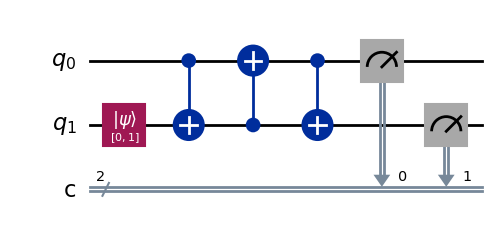

In [2]:
# 2 qubit system
qc = qiskit.QuantumCircuit(2, 2)

# Initialize second qubit to |1>
qc.initialize([0, 1], 1)

# CNOT gate (control: qubit 0, target: qubit 1)
qc.cx(0, 1)

# CNOT gate (control: qubit 1, target: qubit 0)
qc.cx(1, 0)

# CNTO gate (control: qubit 0, target: qubit 1)
qc.cx(0, 1)

# Measure qubits
qc.measure([0, 1], [0, 1])

qc.draw(output="mpl")

In [3]:
# Execute the circuit
qc = qiskit.transpile(qc, backend)

job = backend.run(qc, shots=10**4)
result = job.result()

/tmp/ipykernel_2574/579345589.py:4: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(qc, shots=10**4)


In [4]:
counts = result.get_counts()
print(counts)

{'01': 9722, '10': 50, '00': 141, '11': 87}


As expected, in most cases, the qubits switched values, with q_0 ending as 1 and q_1 ending as 0.
Now, we will try with a noise-free simulation.

In [5]:
# noise-free simulation results
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

simulator = AerSimulator()
pass_manager = generate_preset_pass_manager(3, simulator)
transpiled_circuit = pass_manager.run(qc)

simulation_job = simulator.run(transpiled_circuit, shots=1000)

simulation_result = simulation_job.result()
simulation_counts = simulation_result.get_counts(transpiled_circuit)

# Print and plot the results
print("Measurement output:", simulation_counts)

Measurement output: {'01': 1000}
